In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
!pip install pandas-datareader


In [4]:
pip install --upgrade pandas-datareader


In [5]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'
df = yf.download('AAPL', start=start, end=end)
print(df.head())


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.487532  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.498752  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.395379  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.383556  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.425995  447610800


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261604,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327438,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702927,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676094,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.095573,144114400


In [8]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487532,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498752,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800


In [9]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


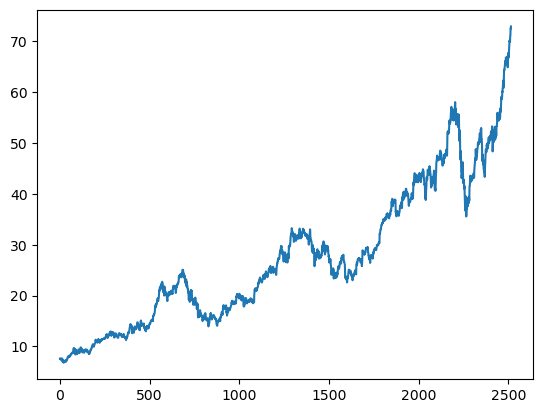

In [10]:
plt.plot(df.Close)

In [11]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

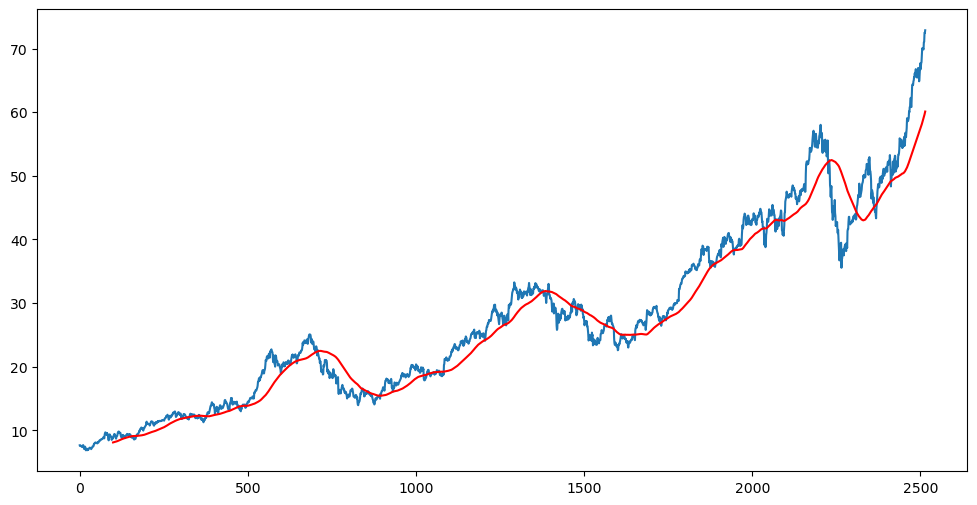

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

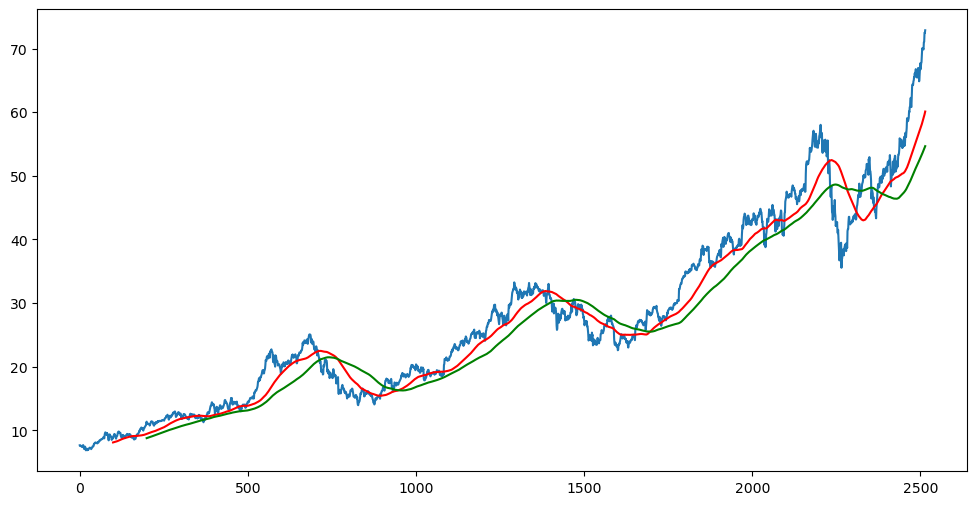

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200,'g')

In [16]:
df.shape

(2515, 5)

In [17]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [18]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [19]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [22]:
pip install alpha_vantage

  Using cached alpha_vantage-2.3.1-py3-none-any.whl (31 kB)
     -------------------------------------- 323.1/323.1 kB 1.1 MB/s eta 0:00:00
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
     ---------------------------------------- 44.4/44.4 kB 2.3 MB/s eta 0:00:00
  Using cached async_timeout-4.0.3-py3-none-any.whl (5.7 kB)
     ---------------------------------------- 61.0/61.0 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from alpha_vantage.timeseries import TimeSeries

# Define the stock symbol and date range
stock_symbol = 'AAPL'  # Replace with your desired stock symbol
start_date = '2020-01-01'
end_date = '2021-01-01'

# Fetch the stock data using Alpha Vantage
api_key = 'YOUR_ALPHA_VANTAGE_API_KEY'  # Replace with your Alpha Vantage API key
ts = TimeSeries(key=api_key, output_format='pandas')
stock_data, _ = ts.get_daily(symbol=stock_symbol, outputsize='full')

# Extract the 'close' prices for scaling
data_to_scale = stock_data['4. close'].values.reshape(-1, 1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(data_to_scale)

# The scaled_data now contains your scaled and normalized data
print(scaled_data)


[[0.23900549]
 [0.23926674]
 [0.23958605]
 ...
 [0.09924816]
 [0.09743389]
 [0.09361665]]


In [25]:
print(scaled_data.shape)


(5983, 1)


In [33]:
x_train = []
y_train = []

for i in range(100, len(scaled_data)):
    x_train.append(scaled_data[i-100:i])
    y_train.append(scaled_data[i, 0])
x_train , y_train = np.array(x_train),np.array(y_train)

# Now x_train and y_train should be populated with the appropriate data


[array([[0.23900549],
        [0.23926674],
        [0.23958605],
        [0.24192284],
        [0.24054399],
        [0.24510145],
        [0.2584255 ],
        [0.260472  ],
        [0.26486255],
        [0.266089  ],
        [0.26518912],
        [0.26140091],
        [0.26325873],
        [0.26198148],
        [0.26071874],
        [0.25954309],
        [0.26127028],
        [0.26412958],
        [0.26214114],
        [0.26251851],
        [0.25772882],
        [0.2575111 ],
        [0.25639351],
        [0.25394061],
        [0.25470986],
        [0.2577143 ],
        [0.25935441],
        [0.25865773],
        [0.26029783],
        [0.26248948],
        [0.25613225],
        [0.25563877],
        [0.25391158],
        [0.24986212],
        [0.25190862],
        [0.25237307],
        [0.24796075],
        [0.24948475],
        [0.24935412],
        [0.25093617],
        [0.24794624],
        [0.24701733],
        [0.24771401],
        [0.24360649],
        [0.24304044],
        [0

In [35]:
print(len(x_train))


5883


In [37]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [39]:
sequence_shape = x_train[0].shape  # Replace 0 with the index of the sequence you're interested in


In [40]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(sequence_shape[0], sequence_shape[1])))
model.add(Dropout(0.2))
# ... rest of your model


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
Total params: 10,400
Trainable params: 10,400
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train,epochs = 50)

Epoch 1/50
184/184 [==============================] - 12s 52ms/step - loss: 0.0535
Epoch 2/50
184/184 [==============================] - 9s 49ms/step - loss: 0.0492
Epoch 3/50
184/184 [==============================] - 10s 52ms/step - loss: 0.0491
Epoch 4/50
184/184 [==============================] - 9s 48ms/step - loss: 0.0490
Epoch 5/50
184/184 [==============================] - 10s 52ms/step - loss: 0.0488
Epoch 6/50
184/184 [==============================] - 10s 55ms/step - loss: 0.0488
Epoch 7/50
184/184 [==============================] - 10s 52ms/step - loss: 0.0488
Epoch 8/50
184/184 [==============================] - 12s 64ms/step - loss: 0.0487
Epoch 9/50
184/184 [==============================] - 11s 58ms/step - loss: 0.0487
Epoch 10/50
184/184 [==============================] - 11s 61ms/step - loss: 0.0487
Epoch 11/50
184/184 [==============================] - 10s 56ms/step - loss: 0.0487
Epoch 12/50
184/184 [==============================] - 9s 50ms/step - loss: 0.0486
Epoc

In [60]:
model.save('keras_model.hs')

INFO:tensorflow:Assets written to: keras_model.hs\assets


INFO:tensorflow:Assets written to: keras_model.hs\assets


In [61]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [63]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [64]:
past_100_days = data_training.tail(100)

In [65]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\utkar\AppData\Local\Temp\ipykernel_21956\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [66]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [67]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [68]:
input_data.shape

(855, 1)

In [70]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [73]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [74]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 1s 16ms/step


In [75]:
y_predicted.shape

(755, 100, 1)

In [76]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [77]:
y_predicted

array([[[0.22161329],
        [0.2285937 ],
        [0.22966951],
        ...,
        [0.22931048],
        [0.22937101],
        [0.22936146]],

       [[0.22165392],
        [0.22851387],
        [0.22964418],
        ...,
        [0.22937101],
        [0.22936146],
        [0.2293588 ]],

       [[0.22157912],
        [0.22849607],
        [0.22966433],
        ...,
        [0.22936146],
        [0.2293588 ],
        [0.22929981]],

       ...,

       [[0.23092294],
        [0.24070641],
        [0.24253097],
        ...,
        [0.2545569 ],
        [0.25491643],
        [0.25507814]],

       [[0.23138317],
        [0.24109936],
        [0.2432036 ],
        ...,
        [0.25491643],
        [0.25507814],
        [0.2555642 ]],

       [[0.23163934],
        [0.24176565],
        [0.2430274 ],
        ...,
        [0.25507814],
        [0.2555642 ],
        [0.2557266 ]]], dtype=float32)

In [78]:
scaler.scale_

array([0.02123255])

In [79]:
scale_factor = 1/0.02123255
y_predicted = y_predicted*scale_factor
y_test = y_test * scale_factor

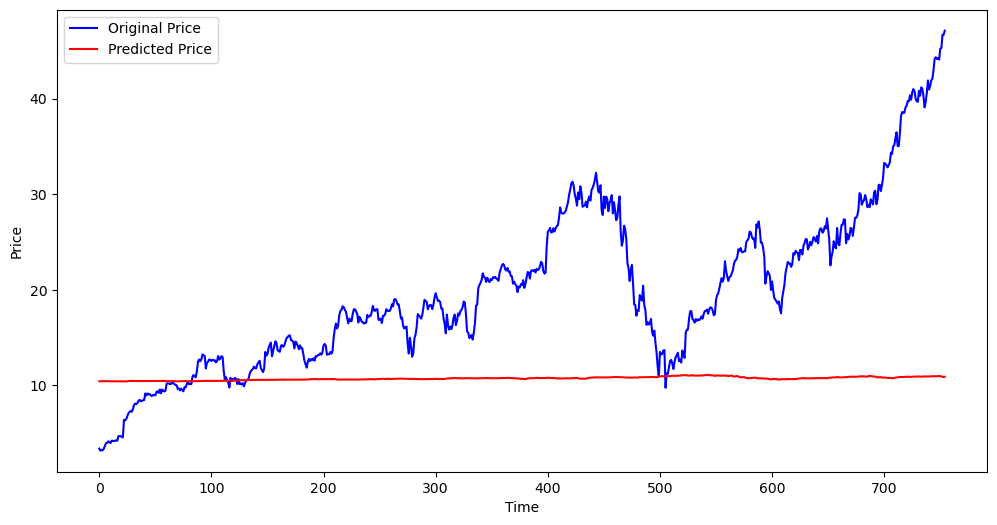

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')

# Reshape y_predicted to match the shape of y_test
y_predicted_reshaped = y_predicted[:, 0, 0]  # Take the first value from each predicted sequence

plt.plot(y_predicted_reshaped, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
